# Report: Final Project (Machine Learning)


## 1. Introduction


In this report, I will present the process of training a classification machine learning model on the provided dataset, aiming to achieve the highest possible performance based on some evaluation metrics.

## 2. Import datasets and necessary libraries

In [44]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [45]:
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Malware_subset.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,43399,443,6,36586,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
1,40422,443,6,36984,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
2,56977,80,6,15638963,5,5,405.0,448.0,405.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
3,60652,80,6,15660249,5,5,405.0,448.0,405.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
4,44512,80,6,14456391,5,3,268.0,519.0,268.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO


## 3. Data preprocessing

### **3.1 Handle missing data**

In [46]:
print(f"Number of missing data: {df.isnull().any().sum()}")

Number of missing data: 0


$\Rightarrow$ The dataset doesn't contain any missing data.

### **3.2 Drop all NaN and infinite values**

Replace all infinite values with NaN to drop them both simultaneously.

In [47]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

print(f"NaN and infinite numbers: {df.isnull().sum().sum()}")

NaN and infinite numbers: 0


$\Rightarrow$ The dataset contains neither NaN nor infinite values.

### **3.3 Drop all duplicates**

Remove some duplicated rows in dataset.

In [48]:
print(f"Number of duplicates: {df.duplicated().sum()}")

df = df.drop_duplicates()

Number of duplicates: 32


### **3.4 Filtering catergorical and numerical columns**

In [49]:
cat_col = [col for col in df.columns if df[col].dtype=='object']
num_col = [col for col in df.columns if df[col].dtype!='object']

print(f'Number of categorical columns: {len(cat_col)}')
print(f'Catergorial columns: {cat_col}')
print(f'Number of numerical columns: {len(num_col)}')
print(f'Numerical columns: {num_col}')

Number of categorical columns: 1
Catergorial columns: ['Label']
Number of numerical columns: 80
Numerical columns: [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet L

$\Rightarrow$ The dataset contains only one categorical column, 'Label,' which is also the target column, while the other columns are numerical.

### **3.5 Encoding the catergorial columns**

In [50]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['Label'])

df['Label'] = encoder.fit_transform(df['Label'])

### **3.6 Data Distribution Visualization**

##### **3.6.1 Visualize the distribution of categories in the target column using a bar chart**

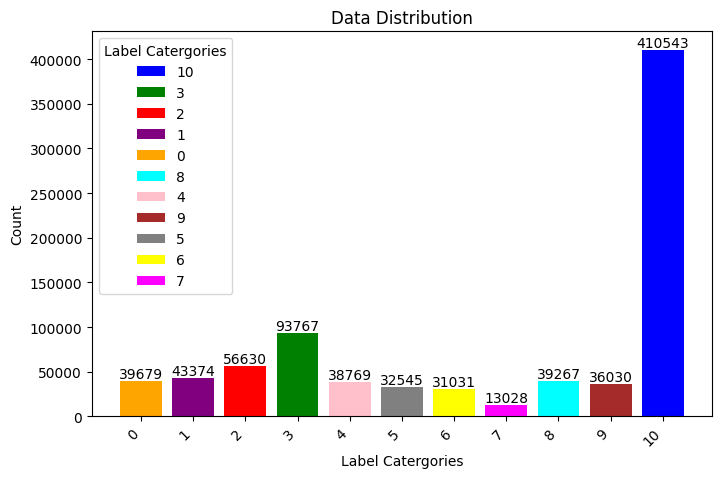

In [51]:
# Set the width and height size
plt.figure(figsize=(8,5))

# Get labels and values of column 'Label'
labels = df['Label'].value_counts().index.to_numpy()
values = df['Label'].value_counts().values

# Create colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'pink', 'brown', 'gray', 'yellow', 'magenta']

# Create bars
bars = plt.bar(labels, values, align='center',label=labels, color=colors)

# Title & labels
plt.title('Data Distribution')
plt.xlabel('Label Catergories')
plt.ylabel('Count')
plt.legend(title='Label Catergories')
plt.xticks(np.arange(0, 11, 1))
plt.xticks(rotation=45, ha='right')  # Rotate labels neatly

# Add value labels on top of bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', fontsize=10)

plt.show()

$\Rightarrow$ Through above bar chart, we can assume that this is the imbalanced dataset.

#### **3.6.2 Visualize the data distribution in the feature column using a boxplot**

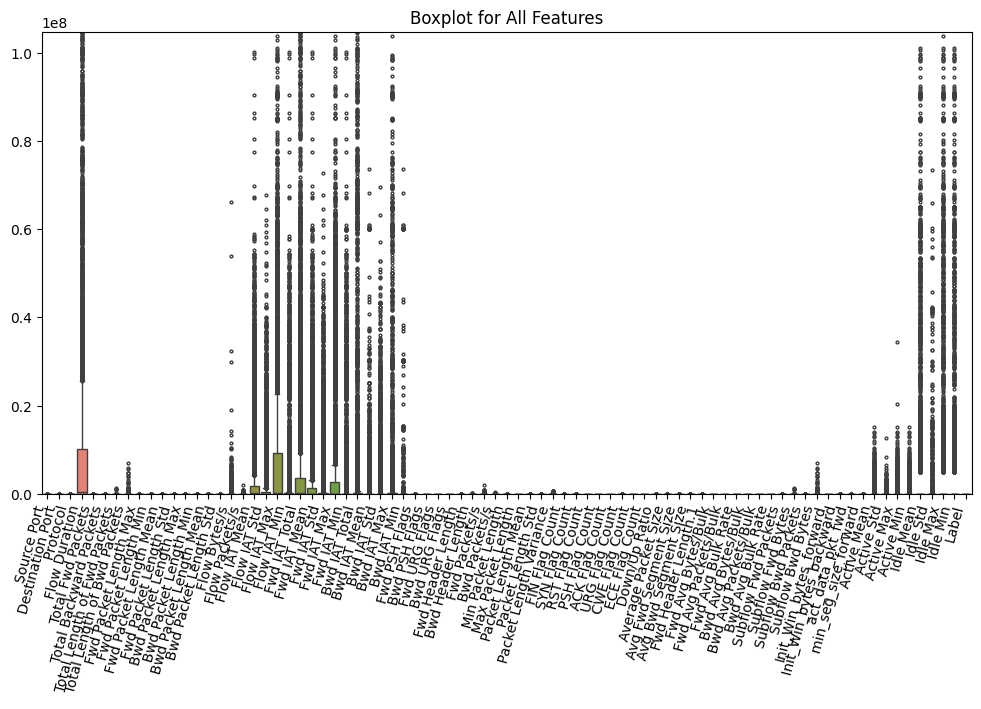

In [52]:
plt.figure(figsize=(12, 6))

# Create shuffle data_frame with 10000 rows
rng_df = df.sample(frac=1, random_state=42).reset_index(drop=True)[:10000]

sns.boxplot(data=rng_df, flierprops={'markersize': 2})

plt.xticks(rotation=75, ha='right')
plt.title("Boxplot for All Features")
plt.ylim(0, df.iloc[:, :-1].quantile(0.99).max())

plt.show()

$\Rightarrow$ As we can see, the dataset contain a lot of outliers. So, we need use some method to filter outliers.

### **3.7 Using IQR to filter outliers**

In [53]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Before filtering outliers: {df.shape}")
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f"After filtering outliers: {df.shape}")

Before filtering outliers: (834663, 81)
After filtering outliers: (15075, 81)


### **3.8 Drop all data that contain full values of -1 or 0**

In [54]:
df = df.loc[:, ~((df == 0) | (df == -1)).all(axis=0)]

## 4. Spliting dataset into train and test

### **4.1 Split the feature and target columns**

In [55]:
X = df.drop('Label', axis=1)
y = df["Label"]

### **4.2 Scaling Data**

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### **4.3 Select important features and remove unimportant ones**

In [57]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import VarianceThreshold

# Select important features
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
selected_features = X.columns[np.abs(lasso.coef_) > 0]
X = X[selected_features]

# Remove unimportant features
selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)

### **4.4 Divive data into train and test**

In [58]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **4.5 Resampling Data**

We use SMOTE for oversampling the minority class, in order to help balance class distribution.

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

## 5. Training models

Import some required libraries.

In [64]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

Confusion matrix plotting.

In [65]:
def cm_plot(y_test, y_pred):
  confuse_matrix = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=confuse_matrix)
  display.plot()

### **5.1 Random Forest Classifier**

In [62]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.53      0.60      0.56       161
           1       0.27      0.36      0.31       137
           2       0.26      0.32      0.29       167
           3       0.81      0.74      0.77       462
           4       0.15      0.34      0.21        53
           5       0.11      0.31      0.16        36
           6       0.12      0.21      0.15        56
           7       0.07      0.17      0.10        42
           8       0.30      0.43      0.36       130
           9       0.16      0.25      0.19        81
          10       0.79      0.60      0.68      1690

    accuracy                           0.56      3015
   macro avg       0.32      0.39      0.34      3015
weighted avg       0.64      0.56      0.59      3015



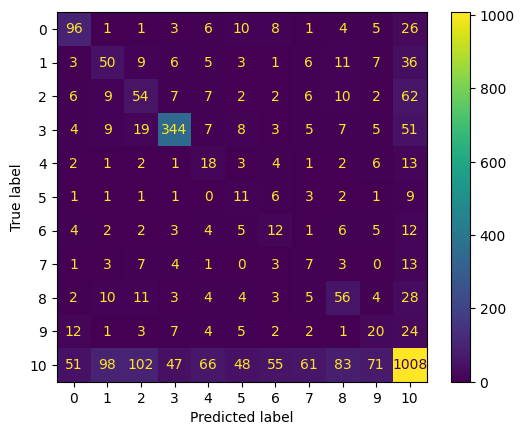

In [66]:
print(classification_report(y_test,y_pred,digits=4))
cm_plot(y_test, y_pred)

### **5.2 Decision Tree Classifier**

In [68]:
rf = DecisionTreeClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.47      0.55      0.50       161
           1       0.22      0.31      0.26       137
           2       0.21      0.29      0.24       167
           3       0.73      0.71      0.72       462
           4       0.11      0.25      0.15        53
           5       0.09      0.28      0.13        36
           6       0.09      0.20      0.12        56
           7       0.09      0.19      0.12        42
           8       0.26      0.42      0.33       130
           9       0.14      0.23      0.17        81
          10       0.77      0.52      0.62      1690

    accuracy                           0.50      3015
   macro avg       0.29      0.36      0.31      3015
weighted avg       0.61      0.50      0.54      3015



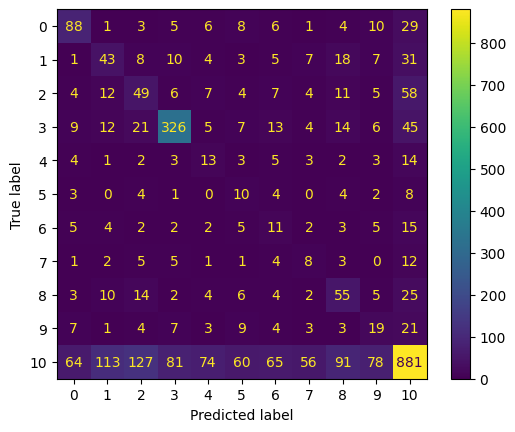

In [69]:
print(classification_report(y_test,y_pred,digits=4))
cm_plot(y_test, y_pred)

### **5.3 Balance Bagging Classifier**

In [74]:
classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.51      0.61      0.56       161
           1       0.28      0.39      0.32       137
           2       0.24      0.33      0.28       167
           3       0.81      0.73      0.77       462
           4       0.15      0.36      0.21        53
           5       0.07      0.22      0.11        36
           6       0.12      0.23      0.15        56
           7       0.10      0.24      0.14        42
           8       0.30      0.44      0.36       130
           9       0.17      0.28      0.21        81
          10       0.80      0.57      0.66      1690

    accuracy                           0.54      3015
   macro avg       0.32      0.40      0.34      3015
weighted avg       0.65      0.54      0.58      3015



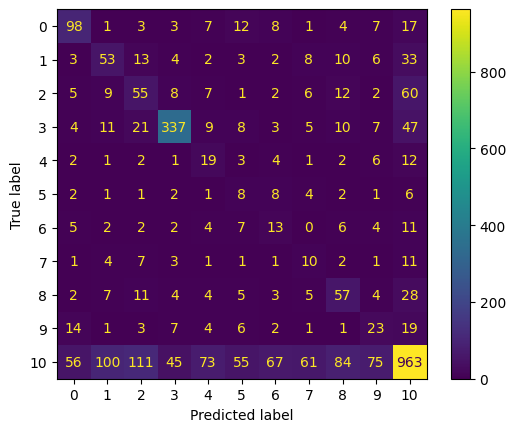

In [73]:
print(classification_report(y_test,y_pred,digits=4))
cm_plot(y_test, y_pred)

## **6. Conclusion**

Random Forest is the best model overall.